In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [2]:
#!pip install pandas==0.25.3
#!pip install scikit-learn==0.22
#!pip install numpy==1.18.0
#!pip install ppscore

In [3]:
import numpy as np 
import pandas as pd
import sklearn
import matplotlib.pyplot as plt 
import seaborn as sns
import ppscore as pps
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import f1_score
from sklearn.externals import joblib

seed = 2020

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [4]:
print('numpy version: '+ np.__version__)
print('pandas version: '+ pd.__version__)
print('sklearn version: '+ sklearn.__version__)

numpy version: 1.18.0
pandas version: 1.3.3
sklearn version: 0.22


In [5]:
pwd

'C:\\Users\\Admin'

In [6]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample_sub = pd.read_csv('gender_submission.csv')

In [7]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


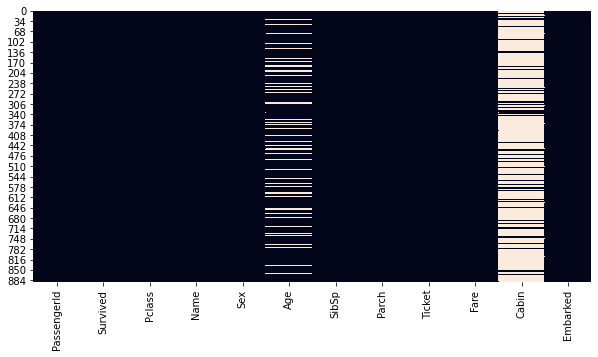

In [11]:
# checking for missing values 
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(train.isnull(), cbar=False)
plt.show()

### There are missing values in age and Cabin features 

# Short Exploratory Data Analysis  

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

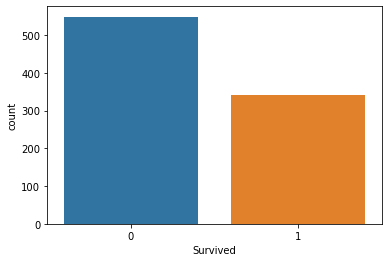

In [12]:
sns.countplot(train.Survived)

### Imbalance dataset... resampling techniques will be useful so as to have better performance evaluation

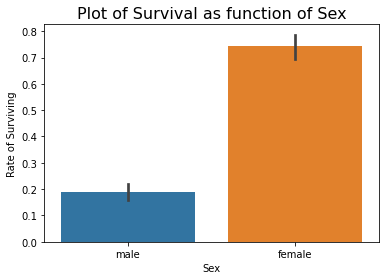

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [13]:
sns.barplot(x='Sex', y='Survived', data=train)
plt.ylabel("Rate of Surviving")
plt.title("Plot of Survival as function of Sex", fontsize=16)
plt.show()
train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

### There are much more survivals in female than male

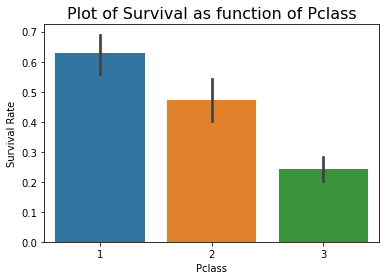

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [14]:
sns.barplot(x='Pclass', y='Survived', data=train)
plt.ylabel("Survival Rate")
plt.title("Plot of Survival as function of Pclass", fontsize=16)
plt.show()
train[["Pclass", "Survived"]].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

### Passengers in Pclass 1 and 2 have higher chances of surviving 

<AxesSubplot:>

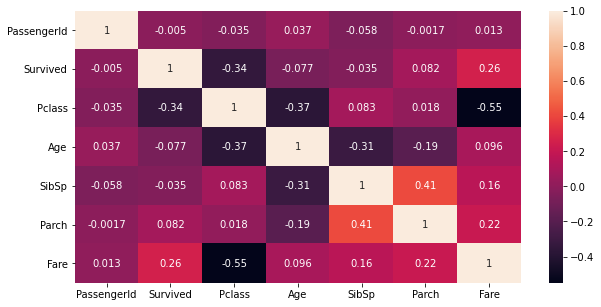

In [15]:
plt.figure(figsize=(10,5))
sns.heatmap(train.corr(),annot=True)

Some features are highly correlated with one another, creating new features will be helpful. e.g Pclass and SibSp are highly correlated, a new feature will be created to reduce the Collinearity

Text(0, 0.5, 'correlation')

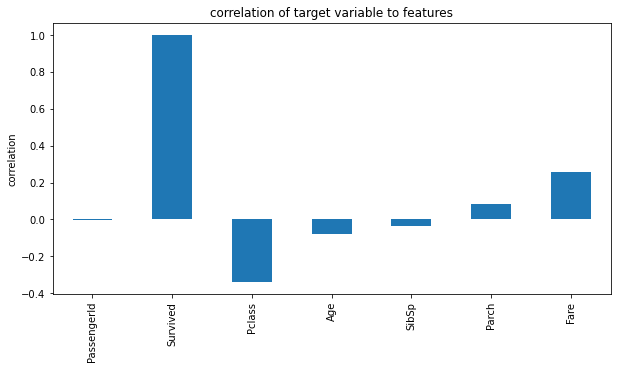

In [16]:
plt.figure(figsize=(10,5))
ax = train.corr()['Survived'].plot(kind='bar',title='correlation of target variable to features')
ax.set_ylabel('correlation')

The passengerId feature will be dropped as this is unique across all samples. Pclass and Fare have the highest absolute correletion with the target variable

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

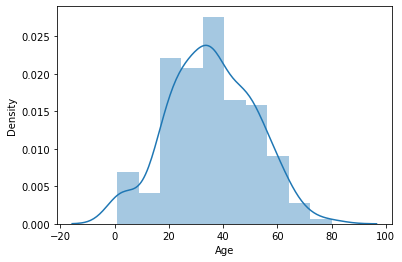

In [17]:
train_copy = train.copy()
train_copy.dropna(inplace = True)
sns.distplot(train_copy.Age)

Looks like the distribution of ages is slightly skewed right. Because of this, we can fill in the null values with the median for the most accuracy.

Text(0.5, 1.0, 'Survival Rates Based on Gender and Class')

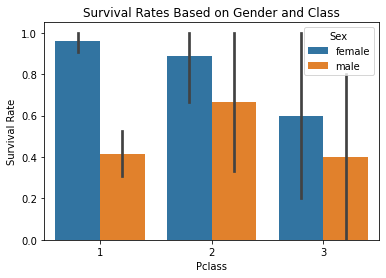

In [18]:
sns.barplot(x="Pclass", y="Survived", hue="Sex", data=train_copy)
plt.ylabel("Survival Rate")
plt.title("Survival Rates Based on Gender and Class")

There were more female survivals than male in all the 3 Pclass categories

Text(0.5, 1.0, 'Survival Rates Based on Gender and Class')

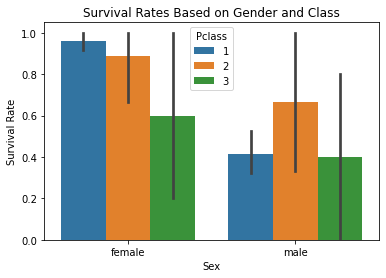

In [19]:
sns.barplot(x="Sex", y="Survived", hue="Pclass", data=train_copy)
plt.ylabel("Survival Rate")
plt.title("Survival Rates Based on Gender and Class")

From the graphs above,Female survival rate in the all the Pclasses is higher than male survival rate respectively

In [20]:
train_null = train.isnull().sum()
test_null = test.isnull().sum()
print(train_null[train_null !=0])
print('-'*40)
print(test_null[test_null !=0])

Age         177
Cabin       687
Embarked      2
dtype: int64
----------------------------------------
Age       86
Fare       1
Cabin    327
dtype: int64


# Handling missing values 

In [21]:
from sklearn.impute import SimpleImputer
age_imp = SimpleImputer(strategy= 'median')
age_imp.fit(np.array(train.Age).reshape(-1,1))

train.Age = age_imp.transform(np.array(train.Age).reshape(-1,1))
test.Age = age_imp.transform(np.array(test.Age).reshape(-1,1))
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [22]:
#save age imputer 
with open('age_imputer.joblib', 'wb') as f:
  joblib.dump(age_imp,f)

In [23]:
emb_imp = SimpleImputer(strategy= 'most_frequent' )
emb_imp.fit(np.array(train.Embarked).reshape(-1,1))

train.Embarked = emb_imp.transform(np.array(train.Embarked).reshape(-1,1))
test.Embarked = emb_imp.transform(np.array(test.Embarked).reshape(-1,1))
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [24]:
#save embark imputer 
with open('embark_imputer.joblib', 'wb') as f:
  joblib.dump(emb_imp,f)

In [25]:
train.isnull().sum() 
print('-'*40)
test.isnull().sum()

----------------------------------------


PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [26]:
drop_cols = ['PassengerId','Ticket','Cabin','Name']
train.drop(columns=drop_cols,axis=1,inplace = True)
test_passenger_id = test.PassengerId
test.drop(columns=drop_cols,axis=1,inplace = True)

In [27]:
test.fillna(value = test.mean(),inplace=True)

<ipython-input-27-73daf52e77c1>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  test.fillna(value = test.mean(),inplace=True)


In [28]:
train.isnull().sum().any() , test.isnull().sum().any()

(False, False)

In [29]:
train['Number_of_relatives'] = train.Parch + train.SibSp
test['Number_of_relatives'] = test.Parch + test.SibSp

train.drop(columns=['Parch','SibSp'],axis=1,inplace=True)
test.drop(columns=['Parch','SibSp'],axis=1,inplace=True)

In [30]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Number_of_relatives
0,0,3,male,22.0,7.2500,S,1
1,1,1,female,38.0,71.2833,C,1
2,1,3,female,26.0,7.9250,S,0
3,1,1,female,35.0,53.1000,S,1
4,0,3,male,35.0,8.0500,S,0


In [31]:
gender_dic = {'male':1,'female':0}
train.Sex = train.Sex.map(gender_dic)
test.Sex = test.Sex.map(gender_dic)
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Number_of_relatives
0,0,3,1,22.0,7.2500,S,1
1,1,1,0,38.0,71.2833,C,1
2,1,3,0,26.0,7.9250,S,0
3,1,1,0,35.0,53.1000,S,1
4,0,3,1,35.0,8.0500,S,0


In [32]:
cat_col = ['Embarked', 'Pclass']
One_hot_enc = OneHotEncoder(sparse=False,drop='first',dtype=np.int)

In [33]:
encoded_train = pd.DataFrame(data=One_hot_enc.fit_transform(train[cat_col]), columns=['emb_2','emb_3','Pclass_2','Pclass_3'])
encoded_test = pd.DataFrame(data=One_hot_enc.transform(test[cat_col]),columns=['emb_2','emb_3','Pclass_2','Pclass_3'])

In [34]:
#save One_hot_enc 
with open('One_hot_enc.joblib', 'wb') as f:
  joblib.dump(One_hot_enc,f)

In [35]:
train.drop(columns=cat_col,axis=1,inplace=True)
test.drop(columns=cat_col,axis=1,inplace=True)

train = pd.concat([train,encoded_train],axis=1)
test = pd.concat([test,encoded_test],axis=1)
train.head()

,Survived,Sex,Age,Fare,Number_of_relatives,emb_2,emb_3,Pclass_2,Pclass_3
0,0,1,22.0,7.2500,1,0,1,0,1
1,1,0,38.0,71.2833,1,0,0,0,0
2,1,0,26.0,7.9250,0,0,1,0,1
3,1,0,35.0,53.1000,1,0,1,0,0
4,0,1,35.0,8.0500,0,0,1,0,1


In [36]:
features = test.columns
X = train[features]
y = train.Survived

In [37]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
test = scaler.transform(test)

In [38]:
#save scaler 
with open('scaler.joblib', 'wb') as f:
  joblib.dump(scaler,f)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=seed)

In [40]:
logistic_model  = LogisticRegression()
logistic_model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [41]:
print('f1_score on training set: {}'.format(f1_score(logistic_model.predict(X_train),y_train)))
print('f1_score on test set: {}'.format(f1_score(logistic_model.predict(X_test),y_test)))

f1_score on training set: 0.7499999999999999
f1_score on test set: 0.7027027027027027


In [42]:
logistic_model.fit(X,y)
#save model 
with open('model-v1.joblib', 'wb') as f:
  joblib.dump(logistic_model,f)